In [1]:
import pandas as pd
df = pd.read_csv('./apteka.csv',sep=';')
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
0,2021-07-13 12:56:09.000,Аптека 2,2000200195023,51,0,3400,3400,15#2002741#65938#2_29
1,2021-07-30 10:42:00.000,Аптека 2,2000200193494,57,0,747,747,15#2002972#65955#2_5
2,2021-10-11 12:55:23.000,Аптека 2,2000200199106,92,253,3077,3077,15#2004060#66028#2_29
3,2021-10-14 14:48:56.000,Аптека 2,2000200168768,1,0,54,54,15#2004107#66031#2_57
4,2021-10-20 11:09:39.000,Аптека 2,2000200226314,101,0,1733,1733,15#2004192#66037#2_16
...,...,...,...,...,...,...,...,...
38481,2022-06-09 20:45:32.000,Аптека 11,2000200244974,32,0,1341,1341,15#18001790#66269#18_120
38482,2022-06-09 20:55:32.000,Аптека 11,2000200239246,38,0,1445,1445,15#18001790#66269#18_123
38483,2022-06-09 20:59:41.000,Аптека 11,2000200238867,57,0,1912,1912,15#18001790#66269#18_126
38484,2022-06-09 21:07:59.000,Аптека 11,2000200165811,2,0,278,278,15#18001790#66269#18_129


### Словарик
datetime - дата время покупки
shop - магазин где куплено
card - номер бонусной карты (есть хеши какие-то)
bonus_earned - получено бонусов
bonus_spent - потрачено бонусов
summ - цена
summ_with_disc - цена со скидкой
doc_id - наверн Id покупателя

### Посмотрим какие типы данных

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38486 entries, 0 to 38485
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   datetime        38486 non-null  object
 1   shop            38486 non-null  object
 2   card            38486 non-null  object
 3   bonus_earned    38486 non-null  int64 
 4   bonus_spent     38486 non-null  int64 
 5   summ            38486 non-null  int64 
 6   summ_with_disc  38486 non-null  int64 
 7   doc_id          38486 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.3+ MB


In [20]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38486 entries, 0 to 38485
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        38486 non-null  datetime64[ns]
 1   shop            38486 non-null  object        
 2   card            38486 non-null  object        
 3   bonus_earned    38486 non-null  int64         
 4   bonus_spent     38486 non-null  int64         
 5   summ            38486 non-null  int64         
 6   summ_with_disc  38486 non-null  int64         
 7   doc_id          38486 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.3+ MB


### Посмотрим на дубликаты

In [7]:
df['doc_id'].value_counts()

15#11009179#66003#11_199    3
15#17000300#66127#17_51     2
15#17000057#66115#17_17     2
15#7000547#66160#7_68       2
15#7000547#66160#7_78       2
                           ..
15#11010453#66056#11_1      1
15#11010453#66056#11_3      1
15#15002943#66056#15_1      1
15#13004122#66056#13_11     1
15#18001790#66269#18_137    1
Name: doc_id, Length: 38480, dtype: int64

In [5]:
df[df['doc_id'].duplicated()]

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
6645,2021-09-16 20:10:48.000,Аптека 7,cf1dcbed-2d3e-4054-a04c-36c88c2e6f63,27,0,943,907,15#11009179#66003#11_199
6646,2021-09-16 20:11:28.000,Аптека 7,cf1dcbed-2d3e-4054-a04c-36c88c2e6f63,27,0,943,907,15#11009179#66003#11_199
19911,2022-01-06 12:57:45.000,Аптека 10,2000200208211,66,0,2207,2207,15#17000057#66115#17_17
21262,2022-01-18 17:26:16.000,Аптека 10,2000200188902,11,0,371,371,15#17000300#66127#17_51
25868,2022-02-20 18:37:47.000,Аптека 4,abaee6eb-5569-4081-b8f4-5b0e051605cc,50,0,1676,1676,15#7000547#66160#7_68
25870,2022-02-20 18:37:53.000,Аптека 4,7bf2b55a-347b-4c49-8e25-8e4c0f0c7e50,1,0,130,130,15#7000547#66160#7_78


In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('\n')

datetime
['2021-07-13 12:56:09.000' '2021-07-30 10:42:00.000'
 '2021-10-11 12:55:23.000' ... '2022-06-09 20:59:41.000'
 '2022-06-09 21:07:59.000' '2022-06-09 21:49:45.000']


shop
['Аптека 2' 'Аптека 11' 'Аптека 1' 'Аптека 10' 'Аптека 8' 'Аптека 7'
 'Аптека 4' 'Аптека 6']


card
['2000200195023' '2000200193494' '2000200199106' ...
 '99e0fb38-7dc2-49a2-8d5b-b9c1a6584d57' '2000200254881'
 '6daa372b-b02e-4226-a667-85758af03aac']


bonus_earned
[ 51  57  92   1 101   8  17  33  26   6  12  23  41 247  60  55  11   7
  14  44  30  54   5  89  53   3  24  29  16   2 115   9  28  18  45  52
  39  15  38  35  68   0  88  27  10 176  37  21   4  25  50  13  22  79
  40  78  20  19 152 126  59  80  65  32  67  72 105  75  74  36  91  46
  48  42  73 154  69  71  47  58  84 190  70  94  34  61  43  66 113  87
 108 242  98  77  31  64 104 102  95 184  62  56 111  93 106 135 107 110
  83  97 132 117  76 112  63  99 209 155 141  85  49 138 140 120  82 180
 103 133 166 130 134  81 109 122 186 114 146

In [16]:
df.describe()

,bonus_earned,bonus_spent,summ,summ_with_disc
count,38486.000000,38486.000000,38486.000000,38486.000000
mean,25.719015,18.242712,836.735644,834.007379
std,31.899993,44.945897,951.381219,948.206653
min,0.000000,0.000000,6.000000,6.000000
25%,5.000000,0.000000,275.000000,274.000000
50%,15.000000,0.000000,570.000000,569.000000
75%,33.000000,14.000000,1040.000000,1037.000000
max,807.000000,1192.000000,23229.000000,23229.000000


In [23]:
df = df[df['card'].str.startswith('2000')]
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
0,2021-07-13 12:56:09,Аптека 2,2000200195023,51,0,3400,3400,15#2002741#65938#2_29
1,2021-07-30 10:42:00,Аптека 2,2000200193494,57,0,747,747,15#2002972#65955#2_5
2,2021-10-11 12:55:23,Аптека 2,2000200199106,92,253,3077,3077,15#2004060#66028#2_29
3,2021-10-14 14:48:56,Аптека 2,2000200168768,1,0,54,54,15#2004107#66031#2_57
4,2021-10-20 11:09:39,Аптека 2,2000200226314,101,0,1733,1733,15#2004192#66037#2_16
...,...,...,...,...,...,...,...,...
38481,2022-06-09 20:45:32,Аптека 11,2000200244974,32,0,1341,1341,15#18001790#66269#18_120
38482,2022-06-09 20:55:32,Аптека 11,2000200239246,38,0,1445,1445,15#18001790#66269#18_123
38483,2022-06-09 20:59:41,Аптека 11,2000200238867,57,0,1912,1912,15#18001790#66269#18_126
38484,2022-06-09 21:07:59,Аптека 11,2000200165811,2,0,278,278,15#18001790#66269#18_129


In [26]:
df = df.sort_values(by=['card','datetime'])
df

,datetime,shop,card,bonus_earned,bonus_spent,summ,summ_with_disc,doc_id
641,2021-07-19 09:37:20,Аптека 2,2000200150015,0,1,21,21,15#2002822#65944#2_6
16455,2021-12-07 20:25:21,Аптека 2,2000200150022,30,0,1351,1351,15#2004825#66085#2_140
8751,2021-10-05 16:31:25,Аптека 2,2000200150053,15,0,649,649,15#2003981#66022#2_65
28718,2022-03-17 20:50:23,Аптека 7,2000200150053,1,0,64,64,15#11002624#66185#11_177
834,2021-07-21 11:10:25,Аптека 2,2000200150091,22,0,746,746,15#2002857#65946#2_4
...,...,...,...,...,...,...,...,...
38150,2022-06-07 17:08:45,Аптека 2,2000200259015,69,0,664,664,15#2003527#66267#2_73
38199,2022-06-07 19:19:12,Аптека 2,2000200259381,53,0,245,245,15#2003527#66267#2_109
38147,2022-06-07 19:37:59,Аптека 2,2000200259398,65,0,395,395,15#2003527#66267#2_113
38226,2022-06-08 09:46:52,Аптека 2,2000200259404,73,0,784,784,15#2003546#66268#2_7


In [27]:
max(df['datetime'])

Timestamp('2022-06-09 21:49:45')

Проводим rfm в дату 2022-06-09 т.к. даты давние

In [30]:
df_pre = df.groupby('card').agg(purchase_sum = ('summ_with_disc', 'sum'),
                       purchase_amount = ('summ_with_disc', 'count'),
                       last_purchase = ('datetime','last')).reset_index()
df_pre

,card,purchase_sum,purchase_amount,last_purchase
0,2000200150015,21,1,2021-07-19 09:37:20
1,2000200150022,1351,1,2021-12-07 20:25:21
2,2000200150053,713,2,2022-03-17 20:50:23
3,2000200150091,3549,5,2022-06-05 11:49:47
4,2000200150107,1735,3,2022-06-02 17:54:19
...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45
5922,2000200259381,245,1,2022-06-07 19:19:12
5923,2000200259398,395,1,2022-06-07 19:37:59
5924,2000200259404,784,1,2022-06-08 09:46:52


In [38]:
df_pre['days_since'] = (max(df['datetime'])-(df_pre['last_purchase'])).dt.days

In [39]:
df_pre

,card,purchase_sum,purchase_amount,last_purchase,days_since
0,2000200150015,21,1,2021-07-19 09:37:20,325
1,2000200150022,1351,1,2021-12-07 20:25:21,184
2,2000200150053,713,2,2022-03-17 20:50:23,84
3,2000200150091,3549,5,2022-06-05 11:49:47,4
4,2000200150107,1735,3,2022-06-02 17:54:19,7
...,...,...,...,...,...
5921,2000200259015,664,1,2022-06-07 17:08:45,2
5922,2000200259381,245,1,2022-06-07 19:19:12,2
5923,2000200259398,395,1,2022-06-07 19:37:59,2
5924,2000200259404,784,1,2022-06-08 09:46:52,1


<Axes: >

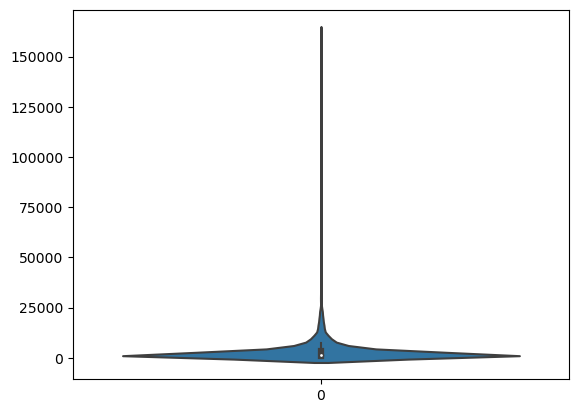

In [85]:
import seaborn as sns
sns.violinplot(df_pre['purchase_sum'])

In [86]:
import numpy as np
quantiles = np.arange(0.1,1.1,0.1)
quantiles

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [87]:
df_pre['purchase_sum'].quantile(quantiles)

0.1       405.5
0.2       620.0
0.3       844.0
0.4      1103.0
0.5      1470.5
0.6      2008.0
0.7      2731.0
0.8      4078.0
0.9      6906.5
1.0    162687.0
Name: purchase_sum, dtype: float64

In [88]:
df_pre['purchase_sum'].quantile(quantiles).reset_index(drop=True)

0       405.5
1       620.0
2       844.0
3      1103.0
4      1470.5
5      2008.0
6      2731.0
7      4078.0
8      6906.5
9    162687.0
Name: purchase_sum, dtype: float64

In [89]:
df_pre['purchase_sum'].quantile(quantiles)

0.1       405.5
0.2       620.0
0.3       844.0
0.4      1103.0
0.5      1470.5
0.6      2008.0
0.7      2731.0
0.8      4078.0
0.9      6906.5
1.0    162687.0
Name: purchase_sum, dtype: float64

In [90]:
sns.barplot(df_pre['purchase_sum'].quantile(quantiles))

KeyError: 0

In [91]:
df_pre['purchase_sum'].quantile(quantiles)

0.1       405.5
0.2       620.0
0.3       844.0
0.4      1103.0
0.5      1470.5
0.6      2008.0
0.7      2731.0
0.8      4078.0
0.9      6906.5
1.0    162687.0
Name: purchase_sum, dtype: float64

In [95]:
df_pre['purchase_sum'].quantile(quantiles)

0.1       405.5
0.2       620.0
0.3       844.0
0.4      1103.0
0.5      1470.5
0.6      2008.0
0.7      2731.0
0.8      4078.0
0.9      6906.5
1.0    162687.0
Name: purchase_sum, dtype: float64

In [134]:
purchase = pd.DataFrame([df_pre['purchase_sum'].quantile(quantiles).values,df_pre['purchase_sum'].quantile(quantiles).index]).T
purchase[1] = purchase[1].apply(lambda x:round(x,2))

[Text(0, 0, '405.5'),
 Text(0, 0, '620'),
 Text(0, 0, '844'),
 Text(0, 0, '1103'),
 Text(0, 0, '1470.5'),
 Text(0, 0, '2008'),
 Text(0, 0, '2731'),
 Text(0, 0, '4078'),
 Text(0, 0, '6906.5'),
 Text(0, 0, '162687')]

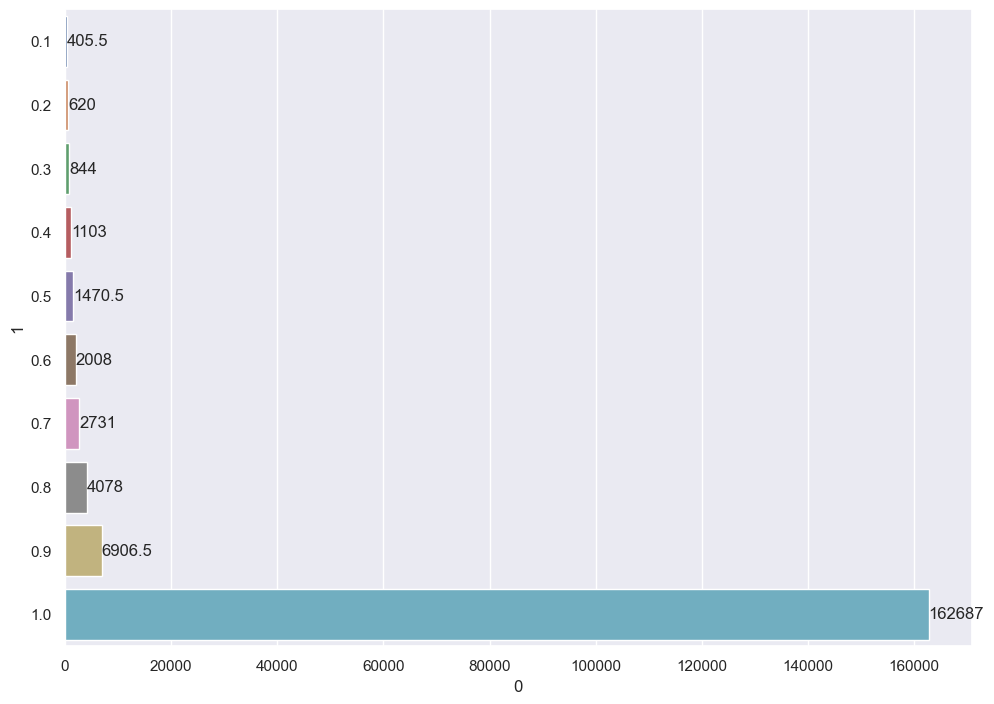

In [141]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(
    purchase, x = 0, y = 1, 
    orient='h',
)
ax.bar_label(ax.containers[0])

In [84]:
bax = sns.barplot(
    df_pre['purchase_sum'].quantile(quantiles),
    orient='h'
)
ax.bar_label(ax.containers[-1]);

KeyError: 0

In [82]:
df_pre['purchase_amount'].quantile(quantiles)

0.33    1.0
0.66    3.0
Name: purchase_amount, dtype: float64

In [83]:
df_pre['days_since'].quantile(quantiles)

0.33     48.0
0.66    143.0
Name: days_since, dtype: float64

In [80]:
quantiles = [0.33,0.66]

In [81]:
df_pre['days_since'].quantile(quantiles)

0.33     48.0
0.66    143.0
Name: days_since, dtype: float64